# Estadística inferencial

La estadística inferencial nos permite sacar conclusiones a partir de los datos nos ayuda a determinar:

- Muestreo
- Intervalos de confianza
- Validación de hipotesis
- Evitar sesgos

En el Machine Learning nos ayuda a:

- Entender la distrubución de los datos
- Crear y validad hipótesis
- Hacer experimentos
- Elegir los modelos predictibos adecuados según los datos

## Estadísticos principales

**Experimento:** Es un procedimiento que puede repetirse infinitamente y tiene un conjunto bien definido de resultados posibles, conocido como espacio muestral. Existen:

- Aleatorio: Si tiene más de un resultado posible.
- Determinista: Si solo tiene un resultado posible.

**Evento:** Cada uno de los posibles resultados de un experimento.

**Población:** Es el objeto de estudio general.

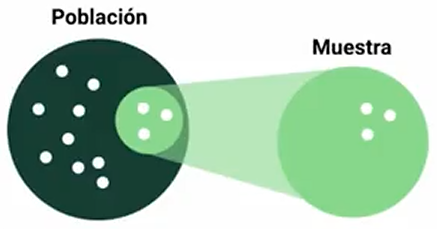

**Muestra:** Es un subconjunto de la población. Que tiene como condiciones:

- Numero suficiente de registros para ser estadisticamente significativo.
- Representación no sesgada de la información total.

**Variable:** Es una caracteristica que puede obtener diferentes valores, se dividenmn en:

- Cualitativos: atributos no medibles.
- Cuantitativos: atributos numéricos o medibles.
    - Discretas
    - Continuas

**Probabilidad:** Mide qué tan posible es que ocurra un evento determinado, su análisis se llama estadística.

**Probabilidad condicionada:** Posibilidad de que ocurrra un evento determinado en consecuencia de que otro evento haya sucedido.$$P(A|B)=\frac{P(A \cup B)}{P(B)}$$

## Poblaciones normales

También conocida como distribución o campana de Gauss, su moda es igual a su media y a la mediana, tiene forma simétrica

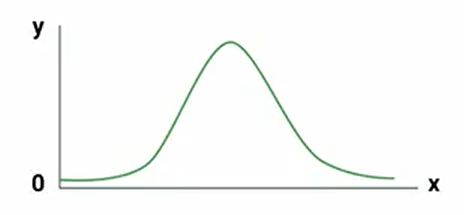

Por ejemplo:
- Calorías y paso
- Presión sanguinea
- Tamaño de los coches producidos por una máquina

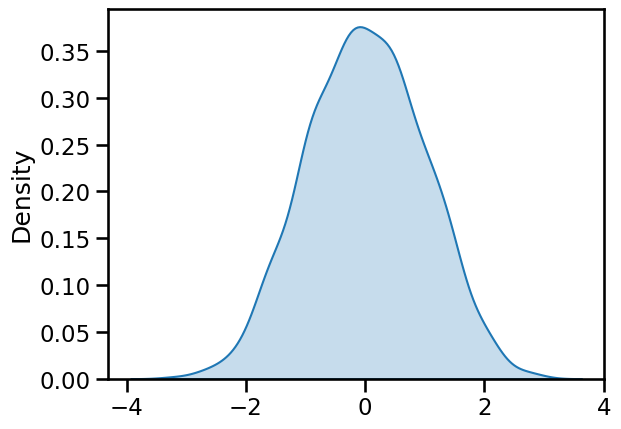

In [87]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.kdeplot(
    np.random.normal(loc=0, scale=1, size=1000),
    fill=True
)
plt.show()

## Muestreo

Es la técnica para la selección de una muestra, la cual se obtiene a partir de una población estadística, la selección debe ser aleatoria y se espera que sus propiedades sea extrapolables a la población.

### Tipos de muestreo

#### Aleatorio simple

Cada una de las muestras tiene la mimas probabilidad de ser elegida, un ejemplo es la lotería.

#### Sistemático

Es un método de selección de unidades al azar y a continuación se eligen el resto siguiendo intervalos regulares, por ejemplo dar un premio cada 100 personas.

#### Estratificado

Se escoge la muestra según un segmento exlusivo y homogéneo, luego se muestrea de forma aleatoria simple, por ejemplo la división por edades

### Teorema del límite central

El teorema del límite central demuestra que las medias de diferentes muestras obtenidas de una misma distribución (ya sea una distribución normal, exponencial o gamma) van a a darnos una distribución normal.

Es decir, si de una población, tomamos varias muestras, y de cada una de esas muestras calculamos la media. el conjunto de esas medias va a describir una distribución normal. Mientras más muestras mas evidente es esa distribución.

Lo importante aquí es entender que no importa el tipo de distribución de esa población. Las medias de esas muestras siempre me darán una distribución normal. Eso demuestra el teorema del límite central.

### Funciones de muestreo

[Dataset](https://static.platzi.com/media/public/uploads/econdata_ea911019-5acc-4c3e-94c1-4bae1896d167.csv)

In [88]:
import pandas as pd
import numpy as np
import random

In [89]:
econdata = pd.read_csv("./data/econdata.csv")
econdata.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real


In [90]:
econdata["delegacion"].replace("Cuauhtémoc", "Cuautémoc", inplace=True)

#### Muestreo aleatorio simple (MAS)

In [91]:
random_8 = econdata.sample(n = 8)
random_8

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
84,84,"19.4426697365,-99.1426738122","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_056_09,Cuautémoc,B,Hotel,Las Americas
87,87,"19.4397239469,-99.1461558557","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_075_19,Cuautémoc,B,Hotel,Astoria
96,96,"19.4236741422,-99.1558164031","{""type"": ""MultiPoint"", ""coordinates"": [[-99.15...",010_015_08,Cuautémoc,B,Hotel,Puebla
146,146,"19.4373584031,-99.1383047535","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_090_14,Cuautémoc,A,Hotel,Congreso Garage
179,179,"19.421906236,-99.1246612487","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",423_006_01,Venustiano Carranza,B,Mercado,Mercado Sonora
74,74,"19.4332681257,-99.1361403471","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_023_17,Cuautémoc,A,Museo,Estanquillo
102,102,"19.4394492343,-99.137176496","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_076_16,Cuautémoc,A,Hotel,Sonora
157,157,"19.4272935771,-99.1227492994","{""type"": ""Polygon"", ""coordinates"": [[[-99.1230...",323_063_08,Venustiano Carranza,B,Mercado,Merced Comidas


In [92]:
prop_25 = econdata.sample(frac=.25)
prop_25.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
102,102,"19.4394492343,-99.137176496","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_076_16,Cuautémoc,A,Hotel,Sonora
133,133,"19.4388860834,-99.1250947991","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",005_099_14,Cuautémoc,B,Hotel,Venecia
124,124,"19.4297560476,-99.1253498219","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",006_052_01,Cuautémoc,A,Hotel,Universo
138,138,"19.4330991176,-99.1423784309","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_024_08,Cuautémoc,B,Hotel,Marlowe
193,193,"19.4269448376,-99.1305051483","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_091_20,Cuautémoc,A,Hotel,Regina


#### Muestreo sistemático

In [93]:
def systematic_sampling(data = econdata, step = 0):
    return data.iloc[::step, :]

In [94]:
systematic_sampling(step=3)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuautémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz
...,...,...,...,...,...,...,...,...
216,216,"19.4247697438,-99.1249707246","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",323_118_37,Venustiano Carranza,B,Mercado,Lamininas de La Merced
219,219,"19.4234096295,-99.1438351156","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_118_03,Cuautémoc,B,Hotel,Prado Floresta
222,222,"19.4397905042,-99.134628735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_063_10,Cuautémoc,A,Hotel,Ladero
225,225,"19.43094655,-99.12455418","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_027_04,Venustiano Carranza,B,Hotel,Gran Veracruz


#### Muestreo estratificado

In [95]:
econdata["estratificado"] = econdata["delegacion"] + ", " + econdata["tipo"]

econdata["estratificado"].value_counts(normalize=True).sort_values(ascending=False)

estratificado
Cuautémoc, Hotel                0.643478
Cuautémoc, Museo                0.156522
Venustiano Carranza, Hotel      0.078261
Cuautémoc, Mercado              0.073913
Venustiano Carranza, Mercado    0.047826
Name: proportion, dtype: float64

In [96]:
econdata["estratificado"].unique()

array(['Cuautémoc, Mercado', 'Cuautémoc, Museo',
       'Venustiano Carranza, Hotel', 'Cuautémoc, Hotel',
       'Venustiano Carranza, Mercado'], dtype=object)

Imagina que nuestros datos son diferentes y sabemos que la proporción es la siguiente:

1) Hoteles en Cuauhtémoc es de 0.5

2) Museos en Cuauhtémoc es de 0.2

3) Hoteles en Venuestiano Carranza es de 0.1 

4) Mercados en Cuauhtémoc es de 0.1

5) Mercados en Venuestiano Carranza es de 0.1

In [97]:
def data_estratificada(econdata, nombres_columnas_estrat, valores_estrat, prop_estrat, random_state=None):
    
    df_estrat = pd.DataFrame(columns = econdata.columns) # Creamos un data frame vacío con los nombres de las columnas de econdata

    pos = -1
    for i in range(len(valores_estrat)): # iteración sobre los valores estratificados
        pos += 1
        if pos == len(valores_estrat) - 1: 
            ratio_len = len(econdata) - len(df_estrat) # si es la iteración final calcula el número de valores de salida tenga el mismo número de filas que de entrada
        else:
            ratio_len = int(len(econdata) * prop_estrat[i]) # calcula el número de filas según la proporción deseada
        df_filtrado = econdata[econdata[nombres_columnas_estrat] ==valores_estrat[i]] # filtra los datos de origen según los valores seleccionados en la estratificación de datos
        df_temp = df_filtrado.sample(replace=True, n=ratio_len, random_state=random_state) # haz un sample de los datos filtrados usando la ratio que hemos calculado
        
        df_estrat = pd.concat([df_estrat, df_temp]) # junta las tablas de sample con la estratificada para producir el resultado final
        
    return df_estrat # Return the stratified, re-sampled data   

In [98]:
valores_estrat = ['Cuautémoc, Hotel', 'Cuautémoc, Museo', 'Venustiano Carranza, Hotel', 'Cuautémoc, Mercado','Venustiano Carranza, Mercado']
prop_estrat = [0.5, 0.2, 0.1, 0.1,0.1]
df_estrat = data_estratificada(econdata, 'estratificado', valores_estrat, prop_estrat, random_state=None)
df_estrat

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
90,90,"19.4241136598,-99.1428624974","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_086_05,Cuautémoc,B,Hotel,Marlyn,"Cuautémoc, Hotel"
138,138,"19.4330991176,-99.1423784309","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_024_08,Cuautémoc,B,Hotel,Marlowe,"Cuautémoc, Hotel"
180,180,"19.4357633849,-99.1330511805","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_094_32,Cuautémoc,A,Hotel,"Catedral, S.A. DE C.V.","Cuautémoc, Hotel"
64,64,"19.44281242,-99.13974599","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",003_053_01,Cuautémoc,B,Hotel,San Martin,"Cuautémoc, Hotel"
222,222,"19.4397905042,-99.134628735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_063_10,Cuautémoc,A,Hotel,Ladero,"Cuautémoc, Hotel"
...,...,...,...,...,...,...,...,...,...
216,216,"19.4247697438,-99.1249707246","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",323_118_37,Venustiano Carranza,B,Mercado,Lamininas de La Merced,"Venustiano Carranza, Mercado"
163,163,"19.4265454033,-99.1224859032","{""type"": ""Polygon"", ""coordinates"": [[[-99.1231...",323_063_05,Venustiano Carranza,B,Mercado,NaN,"Venustiano Carranza, Mercado"
163,163,"19.4265454033,-99.1224859032","{""type"": ""Polygon"", ""coordinates"": [[[-99.1231...",323_063_05,Venustiano Carranza,B,Mercado,NaN,"Venustiano Carranza, Mercado"
37,37,"19.4271233834,-99.125111772","{""type"": ""Polygon"", ""coordinates"": [[[-99.1251...",323_065_01,Venustiano Carranza,B,Mercado,Dulceria,"Venustiano Carranza, Mercado"


In [99]:
df_estrat["estratificado"].value_counts(True)

estratificado
Cuautémoc, Hotel                0.5
Cuautémoc, Museo                0.2
Venustiano Carranza, Hotel      0.1
Cuautémoc, Mercado              0.1
Venustiano Carranza, Mercado    0.1
Name: proportion, dtype: float64

## Valores comunes

### Media

La media es la suma de los datos dividida entre la cantidad de datos.

$$\bar{X} = \frac{1}{N}\sum_{i=1}^{n}x_i$$

### Mediana

Es el dato que está en el centro de todos.

$$\begin{cases}
x\frac{N+1}{2} & \text{si N impar }\\
\frac{1}{2}\left (x\frac{N}{2}+x(\frac{N}{2}+1) \right ) & \text{para, }
\end{cases}$$

### Moda

Es el dato que más se repite

### Media muestral

También conocida como media aritmética, es el valor que se obtiene de sumar un conjunto de valores cuantitativos y dividirlo por el número de total sumados.

Media muestral ($\bar{X}$) $\neq$ Media muestral ($\mu$)

### Varianza y desviación estandar

Son indicadores de qué tan dispersos están los datos respecto a la media, la desviación estandar es la raiz cuadrada de la varianza.

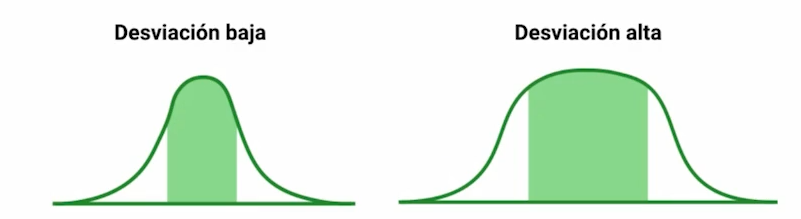

|Muestral   |Poblacional   |
|---|---|
|$s=\sqrt{s^2}=\sqrt{\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}}$   |$\sigma=\sqrt{\sigma^2}=\sqrt{\frac{\sum_{i=1}^N(x_i-\mu)^2}{N}}$   |


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [101]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


![sepal](https://static.platzi.com/media/public/uploads/petalo-sepalo_0ee5ed06-dbab-456d-a755-a584d0ecb5b4.jpeg)

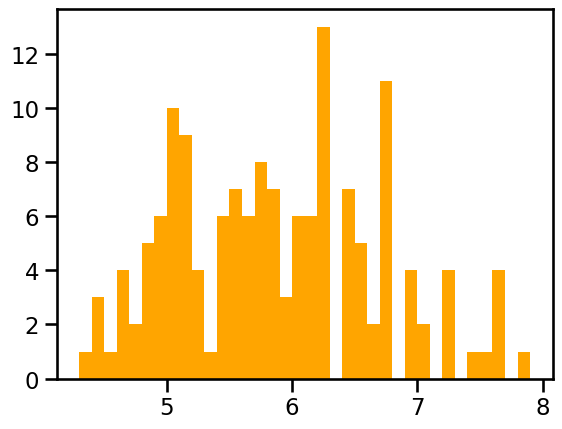

In [102]:
plt.hist(iris["sepal_length"], color="orange", bins=int(180/5))
plt.show()

c:\Users\shani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


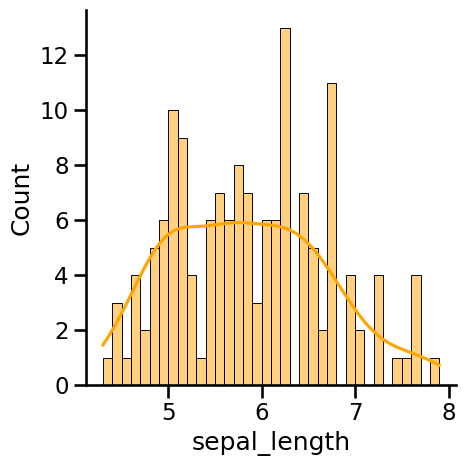

In [103]:
sns.displot(iris["sepal_length"], kind="hist", kde=True, bins = int(180/5), color="orange")
plt.show()

In [104]:
iris["sepal_length"].var()

0.6856935123042505

In [105]:
iris["sepal_length"].std()

0.8280661279778629

In [106]:
iris["sepal_length"].mean()

5.843333333333334

c:\Users\shani\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


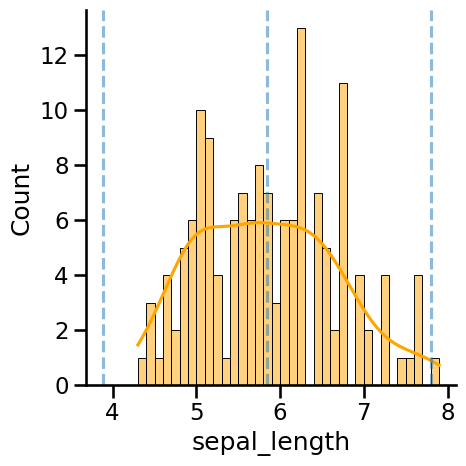

In [107]:
sns.displot(iris["sepal_length"], kind="hist", kde=True, bins = int(180/5), color="orange")
plt.axvline(iris["sepal_length"].mean(), linestyle="--", alpha=0.5)
plt.axvline(iris["sepal_length"].mean() + stats.norm.ppf(0.975), # 5% de confianza
            linestyle="--",
            alpha=0.5)
plt.axvline(iris["sepal_length"].mean() - stats.norm.ppf(0.975), # 5% de confianza
            linestyle="--",
            alpha=0.5)
plt.show()

## Intervalos de confianza

Son un par de números entre los cuales se estuma que estará cierto valor desconocido respecto de un parámetro poblacional con un determinado nivel de confianza.

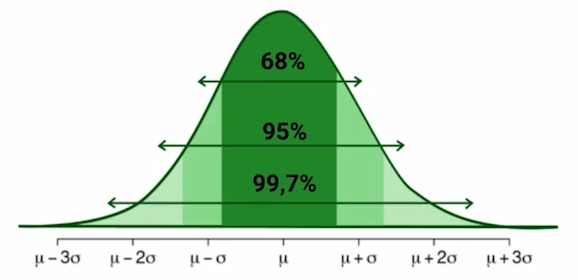

### Nivel de significación

- El alfa es el nivel límite para juzgar si un resultado es o no estadísticamente significativo.
- Si el valor es menor al índice de significación, el resultado es estadísticamente significativo.

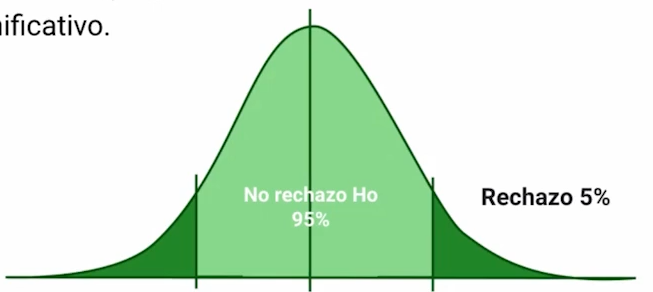

**¿Cómo interpretarlo?**

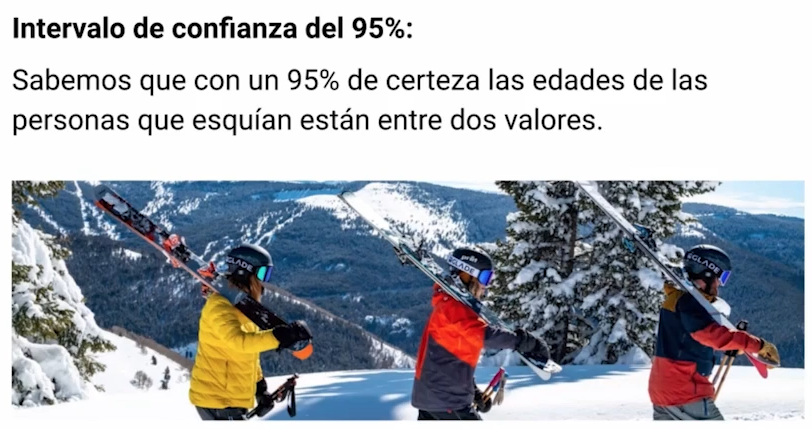

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [109]:
np.random.seed(20)

var1 = np.random.randint(0, 10, 10)
var2 = var1 + np.random.normal(0, 1, 10)

var1, var2

(array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5]),
 array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
        2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207]))

<Axes: >

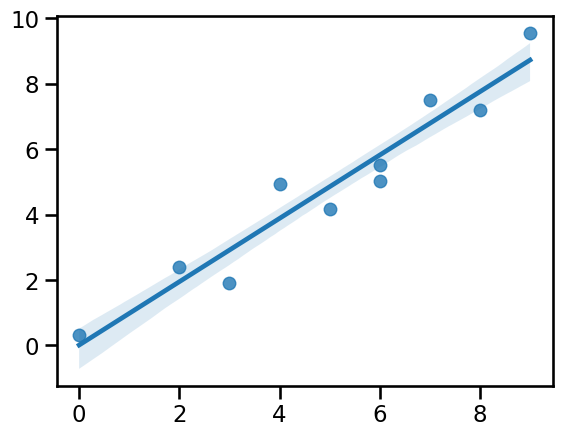

In [110]:
sns.regplot(x = var1,
            y = var2,
            ci=80 # Intervalo de confianza del 80%
)

In [111]:
tuples = list(zip(var1, var2))
tuples

[(3, 1.9151674126826672),
 (9, 9.559696289403918),
 (4, 4.939469349856077),
 (6, 5.021518957881304),
 (7, 7.503096840109191),
 (2, 2.406414468894801),
 (0, 0.3234610099156434),
 (6, 5.50658911809112),
 (8, 7.207983209222818),
 (5, 4.157632065861516)]

In [112]:
df = pd.DataFrame(tuples, columns=["dias", "gasto"])
df

,dias,gasto
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [113]:
stats.t.interval(confidence=0.95,
                 df=len(df)-1,
                 loc=np.mean(df),
                 scale=stats.sem(df)
)

(array([2.93201634, 2.92062172]), array([6.92208653, 6.93348116]))

## Pruebas de hipótesis

Estas pruebas nos ayudan a juzgar si existe una diferencia significativa entre el tamaño de la muestra y el parámetro general. 

Pasos:

1) Establecer las hipotesis H0 (nula) y una hipótesis alternativa
    - H(0) = la hipótesis más aceptada: las ventas de cerveza son las mismas en cualquier época del año. La gente vive lo mismo en todos los países. 
    - H(1): en verano se vende más cerveza. La gente vive más en países nórdicos
2) Seleccionar el nivel de significancia
3) Seleccionar el estadístico de prueba
     - t de student(en poblaciones pequeñas, sin datos de distribución)
     - Coeficiente pearson(medir correlación)
     - ANOVA (comparar la varianza de las distribuciones)
4) Formular la regla de decisión
    Si para el 99% de seguridad tenemos una diferencia vamos a hacer un cambio en la empresa.
5) Interpretar los resultados y tomar una decisión
    Si H(1) es real entonces hay que incrementar nuestro marketing en verano.

### Tipos de hipótesis

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway, ttest_ind

In [116]:
iris = sns.load_dataset("iris")

#### t de Student

Se usa para estimar una media de población normalmente distribuida a partir de una muestra pequeña de la que desconocemos la desviación estandar.

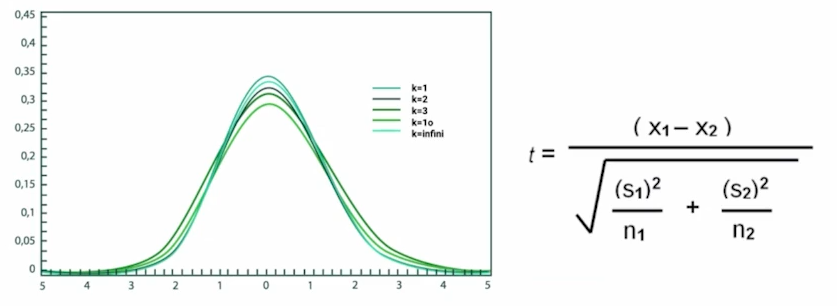

Standar Error:

$$SE = \frac{\sigma}{\sqrt{N}}$$

Standar Error Deviation:

$$SED = \sqrt{\frac{\sigma_1^2}{N_1} + \frac{\sigma_2^2}{N_2}}$$

t de student:

$$t=\frac{(\bar{x_1} - \bar{x_2})}{SED}$$

In [117]:
N = 10 # muestra
se_length = iris["sepal_length"].std() / np.sqrt(10)
se_width = iris["sepal_width"].std() / np.sqrt(10)

In [118]:
sed = np.sqrt((se_length ** 2) + (se_width ** 2))
sed

0.2959177133340904

In [119]:
t_stat = (iris["sepal_length"].mean() - iris["sepal_width"].mean()) / sed
t_stat

9.414779428410265

In [125]:
p = ttest_ind(iris["sepal_length"], iris["sepal_width"])
p 
# Como p es más pequeño que el t que encontramos, se puede rechazar H0, por lo que la distribución de las variables son muy diferentes

TtestResult(statistic=36.463283934449116, pvalue=7.027919392009369e-112, df=298.0)

Para la prueba de t Student lo que se compara son los valores t_calculado con el t_tabulado, siendo que sí 

| t_calculado | > | t_tabulado | se rechaza la Ho.

#### Coeficiente de Pearson

Se usa para medir la dependencia lineal o correlación entre dos valores aleatorios cuantitativos.

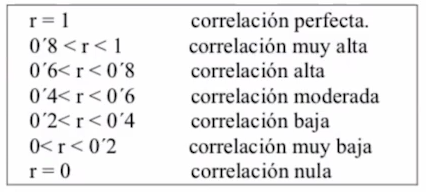

In [127]:
iris["sepal_length"].corr(iris["sepal_width"])

-0.11756978413300202

In [130]:
stats.pearsonr(iris["sepal_length"], iris["sepal_width"])

PearsonRResult(statistic=-0.11756978413300188, pvalue=0.15189826071144827)

#### Análisis de la varianza (ANOVA)

Se usa para comparar las varianzas entre las medias de diferentes grupos.

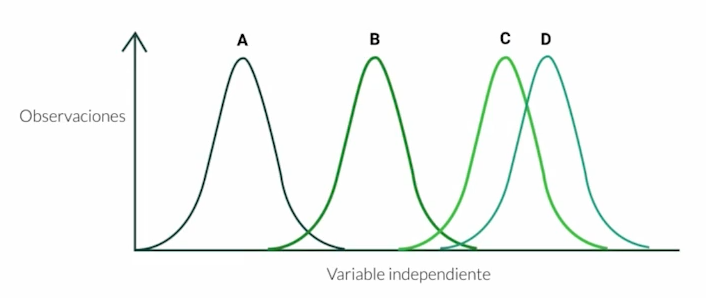

In [131]:
f_oneway(iris["sepal_length"], iris["sepal_width"])

F_onewayResult(statistic=1329.571075284254, pvalue=7.027919392009998e-112)

### Errores más comunes

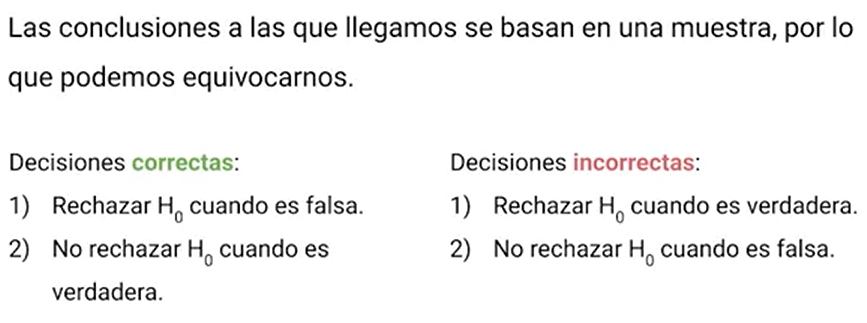

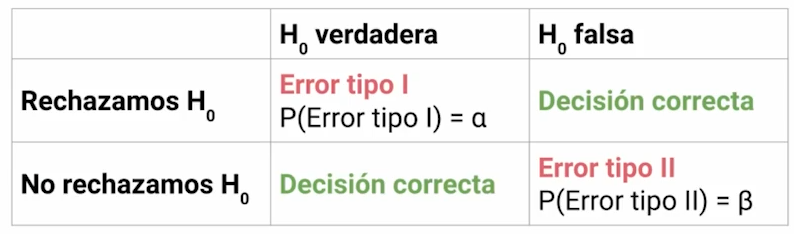

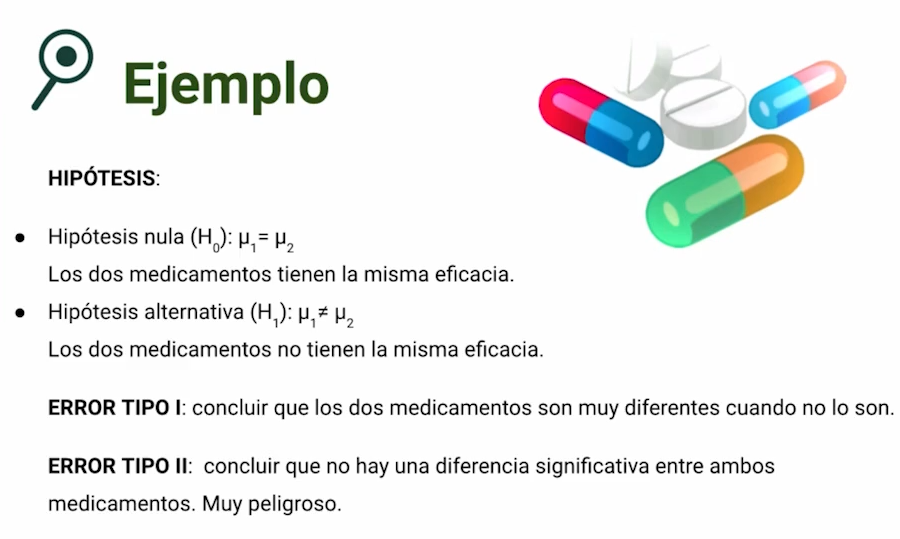

## Bootstrapping

Es un método de muestro dentro de una muestra aleatoria, se usa para hallar una aproximación a la distribución de la variable analizada, es muy útil en muestras pequeñas o muy sesgadas.

![image-4.png](https://miro.medium.com/max/1400/1*SgeDm_wb2QNSF0CSYVmhuw.jpeg)

In [132]:
import pandas as pd
import numpy as np
import random

In [133]:
data = np.random.normal(loc = 34, size = 10000)
data

array([32.72049734, 34.24571517, 33.9558052 , ..., 33.4997036 ,
       31.95154722, 32.50619463])

In [134]:
data.mean()

34.01569046435315

In [137]:
promedio = []

muestras = 40
tamano = 5

for i in range(muestras):
    muestra = random.sample(data.tolist(), tamano)
    promedio.append(np.mean(muestra))
    
np.mean(promedio)

34.00573848295909

## Validación cruzada

Es una técnica para evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba.

![](https://static.platzi.com/media/user_upload/kfold-392ae091-b249-4cdf-9e5a-4642776cc748.jpg)

### División de datos

En k grupos de un tamaño similar

### Usar k - 1 grupos

Para entrenar el modelo con el sobrante.

### Se repite k veces

Se usará este [dataset](https://static.platzi.com/media/public/uploads/cancerdata_80367619-ee78-44cd-a7dc-7970bf56fa94.csv)

In [138]:
import pandas as pd
import numpy as np

In [139]:
df = pd.read_csv("./data/cancerdata.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [142]:
X = df.iloc[:, 2:] # Tomar de la columna 2 en adelante
Y = df.iloc[:, 1]

In [143]:
Y.value_counts() # Hay una buena representacion de ambos

diagnosis
B    357
M    212
Name: count, dtype: int64

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=4)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [146]:
model.score(X_test, y_test) # Precision del modelo

0.9005847953216374

In [147]:
from sklearn.model_selection import KFold

model = DecisionTreeClassifier()

kfold_validation = KFold(10)

In [148]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X, Y, cv=kfold_validation)

array([0.9122807 , 0.9122807 , 0.87719298, 0.94736842, 0.94736842,
       0.98245614, 0.89473684, 0.94736842, 0.94736842, 0.94642857])

In [149]:
cross_val_score(model, X, Y, cv=kfold_validation).mean()

0.9313909774436091